In [1]:
import numpy as np
import pandas as pd

# Function to create synthetic dataset
def create_dataset(num_samples=1000):
    np.random.seed(42)
    humidity = np.random.uniform(0, 100, num_samples)
    precipitation = np.random.uniform(0, 50, num_samples)
    temperature = np.random.uniform(10, 40, num_samples)
    location = np.random.choice(['City', 'Suburb', 'Rural'], num_samples)
    month = np.random.choice(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], num_samples)
    rainfall = humidity * 0.5 + precipitation * 0.3 - temperature * 0.1 + np.random.normal(0, 5, num_samples)
    df = pd.DataFrame({
        'Humidity': humidity,
        'Precipitation': precipitation,
        'Temperature': temperature,
        'Location': location,
        'Month': month,
        'Rainfall': rainfall
    })
    df.to_excel('synthetic_dataset.xlsx', index=False)

if __name__ == "__main__":
    create_dataset()

Summary Statistics:
          Humidity  Precipitation  Temperature     Rainfall
count  1000.000000    1000.000000  1000.000000  1000.000000
mean     49.025655      25.350865    25.072172    29.520238
std      29.213736      14.609495     8.720226    16.214952
min       0.463202       0.160913    10.000349   -10.831913
25%      23.597327      12.053714    17.840529    16.384736
50%      49.680738      25.936695    25.018418    29.742338
75%      74.431959      38.023253    32.773106    42.258676
max      99.971767      49.970686    39.934626    68.831239
Correlation Heatmap:


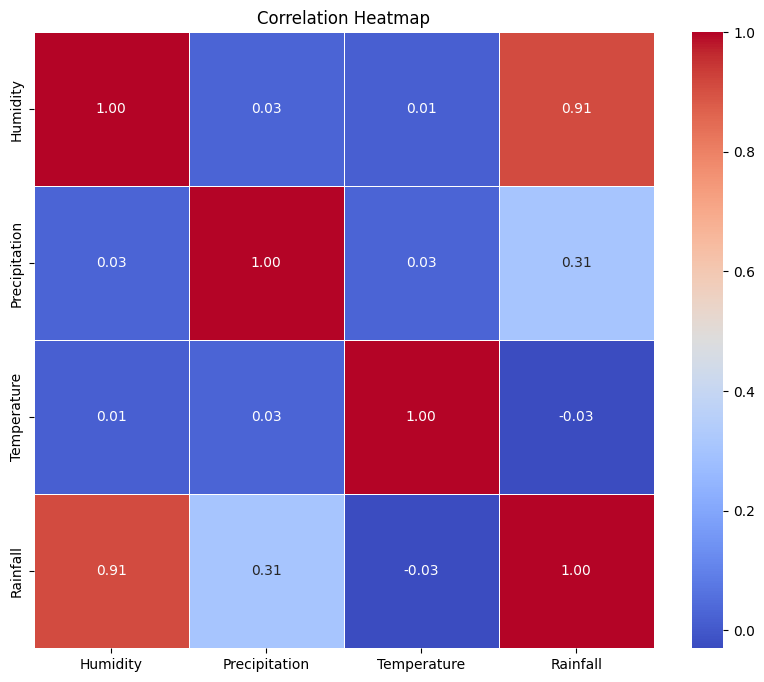

Pairplot:


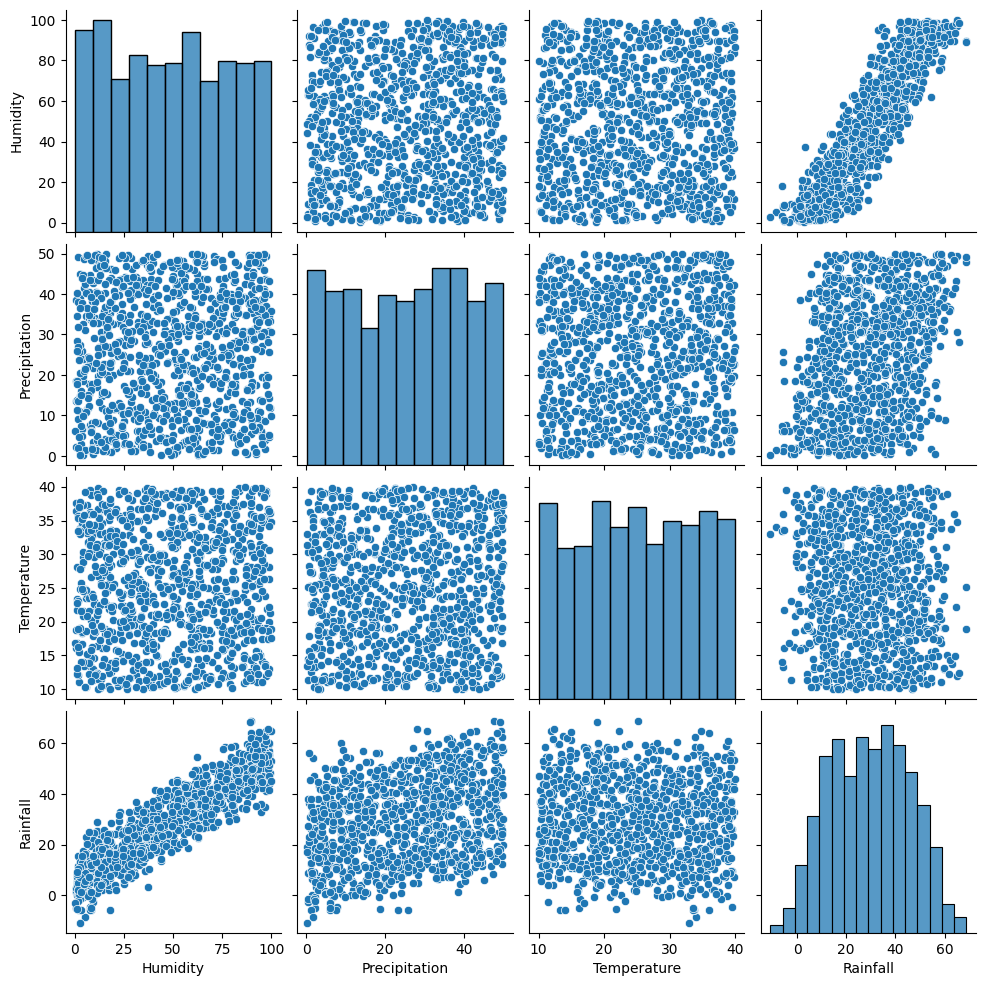

T-Test between Humidity and Precipitation:
T-Statistic: 22.92073
P-Value: 0.0
Null hypothesis rejected: There is a significant difference between the groups.
Scatter Plot of Rainfall vs Temperature with Best Fit Line:


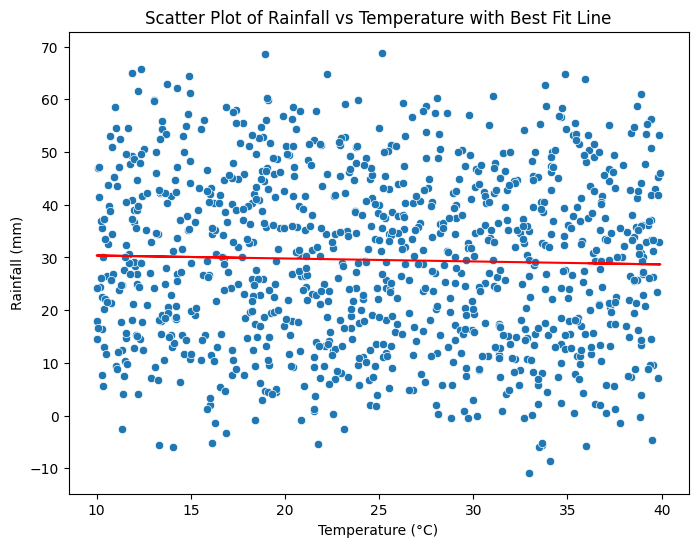

Scatter Plot of Rainfall vs Humidity with Best Fit Line:


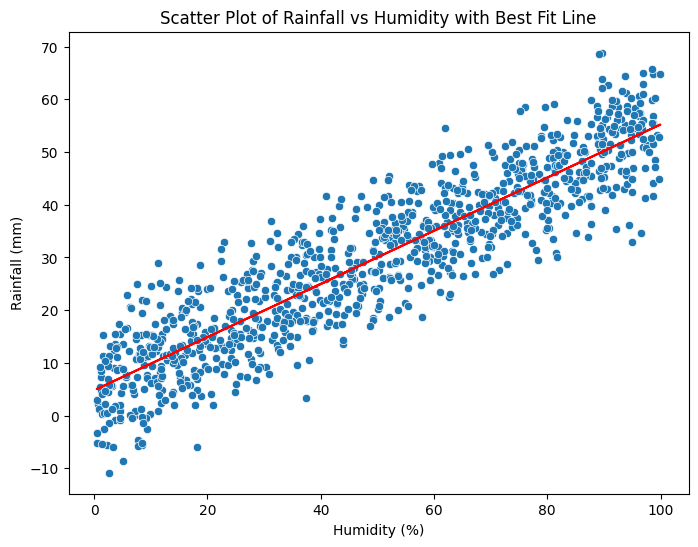

One-way ANOVA for Location and Rainfall:
F-Statistic: 0.75319
P-Value: 0.47113
Null hypothesis cannot be rejected: There is no significant difference between the groups.
Chi-Square Test between Location and Month:
Chi-Square Statistic: 13.80015
P-Value: 0.90842
Null hypothesis cannot be rejected: There is no association between the variables.
RandomForestRegressor Model Evaluation:
Mean Squared Error: 31.09101
R^2 Score: 0.87976

GradientBoostingRegressor Model Evaluation:
Mean Squared Error: 29.37877
R^2 Score: 0.88638

NeuralNetworkRegressor Model Evaluation:
Mean Squared Error: 25.54212
R^2 Score: 0.90122



In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, f_oneway, chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.exceptions import ConvergenceWarning
import warnings

# Suppress ConvergenceWarning
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

# Function to read synthetic dataset from Excel
def read_dataset(file_path):
    df = pd.read_excel(file_path)
    return df

# Function for data preprocessing
def preprocess_data(df):
    # Drop rows with missing values
    df.dropna(inplace=True)
    # Encoding categorical variables
    df = pd.get_dummies(df, columns=['Location'])
    df = pd.get_dummies(df, columns=['Month'])
    return df

# Function to split data into features and target
def split_data(df):
    X = df.drop(columns=['Rainfall'])
    y = df['Rainfall']
    return X, y

# Function to train and evaluate models
def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        "LinearRegression": LinearRegression(),
        "RandomForestRegressor": RandomForestRegressor(random_state=42),
        "GradientBoostingRegressor": GradientBoostingRegressor(random_state=42),
        "NeuralNetworkRegressor": MLPRegressor(random_state=42)
    }

    results = {}
    for name, model in models.items():
        if "Regressor" in name:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            results[name] = {"Mean Squared Error": mse, "R^2 Score": r2}
    return results

# Function for exploratory data analysis (EDA)
def perform_eda(df):
    # Summary statistics
    print("Summary Statistics:")
    print(df.describe())

    # Correlation heatmap
    print("Correlation Heatmap:")
    numerical_cols = df.select_dtypes(include=np.number).columns
    correlation_matrix = df[numerical_cols].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title("Correlation Heatmap")
    plt.show()

    # Pairplot
    print("Pairplot:")
    sns.pairplot(df)
    plt.show()

# Function for hypothesis testing using t-tests
def perform_t_test(df, feature1, feature2):
    print(f"T-Test between {feature1} and {feature2}:")
    t_stat, p_val = ttest_ind(df[feature1], df[feature2])
    t_stat = round(t_stat, 5)
    print(f"T-Statistic: {t_stat}")
    p_val = round(p_val, 5)
    print(f"P-Value: {p_val}")
    if p_val < 0.05:
        print("Null hypothesis rejected: There is a significant difference between the groups.")
    else:
        print("Null hypothesis cannot be rejected: There is no significant difference between the groups.")

 # Add best fit line to scatter plots
    print("Scatter Plot of Rainfall vs Temperature with Best Fit Line:")
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Temperature', y='Rainfall', data=df)
    model = LinearRegression()
    model.fit(df[['Temperature']], df['Rainfall'])
    plt.plot(df['Temperature'], model.predict(df[['Temperature']]), color='red')
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Rainfall (mm)')
    plt.title('Scatter Plot of Rainfall vs Temperature with Best Fit Line')
    plt.show()

    print("Scatter Plot of Rainfall vs Humidity with Best Fit Line:")
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Humidity', y='Rainfall', data=df)
    model = LinearRegression()
    model.fit(df[['Humidity']], df['Rainfall'])
    plt.plot(df['Humidity'], model.predict(df[['Humidity']]), color='red')
    plt.xlabel('Humidity (%)')
    plt.ylabel('Rainfall (mm)')
    plt.title('Scatter Plot of Rainfall vs Humidity with Best Fit Line')
    plt.show()
# Function for hypothesis testing using ANOVA
def perform_anova(df, feature, target):
    print(f"One-way ANOVA for {feature} and {target}:")
    groups = df.groupby(feature)[target].apply(list)
    f_stat, p_val = f_oneway(*groups)
    f_stat = round(f_stat, 5)
    print(f"F-Statistic: {f_stat}")
    p_val = round(p_val, 5)
    print(f"P-Value: {p_val}")
    if p_val < 0.05:
        print("Null hypothesis rejected: There is a significant difference between the groups.")
    else:
        print("Null hypothesis cannot be rejected: There is no significant difference between the groups.")

# Function for hypothesis testing using chi-square test
def perform_chi_square(df, feature1, feature2):
    contingency_table = pd.crosstab(df[feature1], df[feature2])
    print(f"Chi-Square Test between {feature1} and {feature2}:")
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
    chi2_stat = round(chi2_stat, 5)
    print(f"Chi-Square Statistic: {chi2_stat}")
    p_val = round(p_val, 5)
    print(f"P-Value: {p_val}")
    if p_val < 0.05:
        print("Null hypothesis rejected: There is an association between the variables.")
    else:
        print("Null hypothesis cannot be rejected: There is no association between the variables.")

# Main function
def main():
    # Read dataset from Excel
    file_path = "synthetic_dataset.xlsx"  # Update with your file path
    df = read_dataset(file_path)

    # EDA
    perform_eda(df)

    # Hypothesis Testing
    perform_t_test(df, "Humidity", "Precipitation")
    perform_anova(df, "Location", "Rainfall")
    perform_chi_square(df, "Location", "Month")

    # Data preprocessing
    df = preprocess_data(df)

    # Split data into features and target
    X, y = split_data(df)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train and evaluate models
    model_results = train_and_evaluate_models(X_train, X_test, y_train, y_test)

    # Print results
    for model, metrics in model_results.items():
        print(model + " Model Evaluation:")
        for metric, value in metrics.items():
            value = round(value, 5)

            print(f"{metric}: {value}")
        print()

if __name__ == "__main__":
    main()